Description
This dataset contains product reviews and metadata from Amazon, including 142.8 million reviews spanning May 1996 - July 2014.

This dataset includes reviews (ratings, text, helpfulness votes), product metadata (descriptions, category information, price, brand, and image features), and links (also viewed/also bought graphs).

In [11]:
%matplotlib inline
import numpy as np
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import pandas as pd
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('reviews_Musical_Instruments_5.json.gz')

ratings = []

for review in parse("reviews_Musical_Instruments_5.json.gz"):
  ratings.append(review['overall'])

print (sum(ratings) / len(ratings))

4.488743787155248


In [10]:
df = df.drop(['reviewerName', 'reviewTime', 'unixReviewTime', 'helpful', 'asin', 'reviewerID'], axis=1)
df.dropna()

,reviewText,overall,summary
0,"Not much to write about here, but it does exac...",5.0,good
1,The product does exactly as it should and is q...,5.0,Jake
2,The primary job of this device is to block the...,5.0,It Does The Job Well
3,Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY
4,This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.
5,So good that I bought another one. Love the h...,5.0,The Best Cable
6,"I have used monster cables for years, and with...",5.0,Monster Standard 100 - 21' Instrument Cable
7,I now use this cable to run from the output of...,3.0,Didn't fit my 1996 Fender Strat...
8,Perfect for my Epiphone Sheraton II. Monster ...,5.0,Great cable
9,Monster makes the best cables and a lifetime w...,5.0,Best Instrument Cables On The Market


In [20]:
# first feature change: get rid of spaces around keyword and add 'love' and 'not' to keyword list
keywords = ['great', 'good', 'quality', 'five stars', 'awesome', 'cost', 'tune', 'musician', 'music', 'like',
            'work', 'works', 'disappoint', 'nice', 'waste', 'expected', 'awful', 'slow', 'suck', 'below', 'love', 'not', 'improve']
,
for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df[str(key)] = df.reviewText.str.contains(str(key), case=False)

In [16]:
df['positive'] = (df['overall'] >= 4)

In [21]:
data = df[keywords]
target = df['positive']
np.sum(data)

great         3147
good          2804
quality       1441
five stars      42
awesome        274
cost           474
tune          1172
musician       236
music          748
like          3001
work          2822
works         1645
disappoint     195
nice          1611
waste           51
expected       241
awful           26
slow            64
suck            90
below           64
love          1019
not           4366
improve        180
dtype: int64

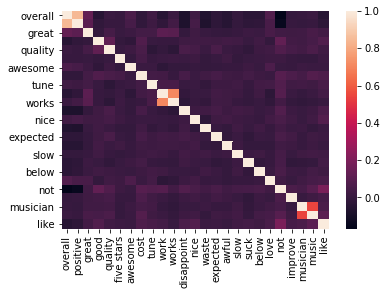

In [22]:
sns.heatmap(df.corr())

In [23]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier


# Instantiate our model and store it in a new variable.
#bnb = BernoulliNB()
bnb = RandomForestClassifier()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 10261 points : 1098


In [24]:
from sklearn.metrics import confusion_matrix
m = confusion_matrix(target, y_pred, labels=[True, False])
labels=[True, False]
df_confusion = pd.DataFrame(m, index = labels, columns = labels)
df_confusion

,True,False
True,8992,30
False,1068,171


30 of our 1,098 errors are due to failing to identify negative sentiments. (Say they are good, but really are bad)

1,068 of our 1,098 errors are due to failing to identify positive statements. (Say they are bad, but really are good)

success rate =99.89%

In [25]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.8602045786653677
Testing on Sample: 0.8936750804015203


In [26]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.87341772, 0.86757546, 0.87719298, 0.87134503, 0.86744639,
       0.86452242, 0.86452242, 0.87037037, 0.85964912, 0.86536585])

# Try model on different category: Patio, Lawn and Garden

In [27]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('reviews_Patio_Lawn_and_Garden_5.json.gz')

ratings = []

for review in parse('reviews_Patio_Lawn_and_Garden_5.json.gz'):
  ratings.append(review['overall'])

print (sum(ratings) / len(ratings))

4.186482820976492


In [30]:
df = df.drop(['reviewerName', 'reviewTime', 'unixReviewTime', 'helpful', 'asin', 'reviewerID'], axis=1)
df.dropna()

,reviewText,overall,summary
0,Good USA company that stands behind their prod...,4.0,Great Hoses
1,This is a high quality 8 ply hose. I have had ...,5.0,Gilmour 10-58050 8-ply Flexogen Hose 5/8-Inch ...
2,It's probably one of the best hoses I've ever ...,4.0,Very satisfied!
3,I probably should have bought something a bit ...,5.0,Very high quality
4,I bought three of these 5/8-inch Flexogen hose...,5.0,Good Hoses
5,I aqm impressed with the cost and quality of t...,5.0,GGGGGGGGREAT
6,After using this hose I will never go back to ...,5.0,More powerful water flow
7,This is one tough hose and it is thick and sti...,5.0,WOW This Is Tough
8,I'll buy more of these come Spring. Holding u...,5.0,Love it
9,So far so good! I have not really had the time...,4.0,Flexible hose as marketed....hope it lives up ...


In [33]:
for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df[str(key)] = df.reviewText.str.contains(str(key), case=False)


df['positive'] = (df['overall'] >= 4)

data = df[keywords]
target = df['positive']

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

confusion_matrix(target, y_pred)

m = confusion_matrix(target, y_pred, labels=[True, False])
labels=[True, False]
df_confusion = pd.DataFrame(m, index = labels, columns = labels)
df_confusion

Number of mislabeled points out of a total 13272 points : 2834


,True,False
True,10264,157
False,2677,174


157 of our 2,834 errors are due to failing to identify negative sentiments. (Say they are good, but really are bad)

2,677 of our 2,834 errors are due to failing to identify positive statements. (Say they are bad, but really are good)

success rate =99.79%

In [34]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.7887005649717514
Testing on Sample: 0.7864677516576251


In [35]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.78705794, 0.78070836, 0.78070836, 0.78824416, 0.78899774,
       0.786737  , 0.78146194, 0.786737  , 0.7905049 , 0.7829691 ])

The model is not as good on this category, but it still has a high accuracy of identifying whether a review will be positive or negative. 

I can probably increase the accuracy of the model by adding more review keywords